# $N^2$-Queens — MCMC



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plot import plot_energy_curve, plot_energy_curve_average, compare_annealing_effect, min_energy_vs_N, plot_min_energy_vs_N
from utility import random_state, get_positions, queens_attack, compute_energy, compute_delta_energy
from mcmc import MCMC_result, metropolis_step_single, run_mcmc, average_energy_over_runs


plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.grid'] = True


/opt/miniconda3/envs/markov/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Each column (i, j) stores a height in [0, N), so the state is an integer N x N matrix.
- Swap two column within row

## MCMC without annealing

step 5000: energy=197, beta=1.250, acceptance=9.4%
step 10000: energy=174, beta=1.250, acceptance=7.0%
step 15000: energy=168, beta=1.250, acceptance=5.9%
step 20000: energy=175, beta=1.250, acceptance=5.6%
step 25000: energy=170, beta=1.250, acceptance=5.2%
step 30000: energy=158, beta=1.250, acceptance=4.9%
step 35000: energy=159, beta=1.250, acceptance=4.7%
step 40000: energy=155, beta=1.250, acceptance=4.4%
step 45000: energy=150, beta=1.250, acceptance=4.2%
step 50000: energy=155, beta=1.250, acceptance=4.0%
step 55000: energy=144, beta=1.250, acceptance=3.9%
step 60000: energy=137, beta=1.250, acceptance=3.7%
step 65000: energy=151, beta=1.250, acceptance=3.7%
step 70000: energy=149, beta=1.250, acceptance=3.5%
step 75000: energy=174, beta=1.250, acceptance=3.5%
step 80000: energy=153, beta=1.250, acceptance=3.5%
step 85000: energy=150, beta=1.250, acceptance=3.4%
step 90000: energy=145, beta=1.250, acceptance=3.4%
step 95000: energy=140, beta=1.250, acceptance=3.3%
step 100000: 

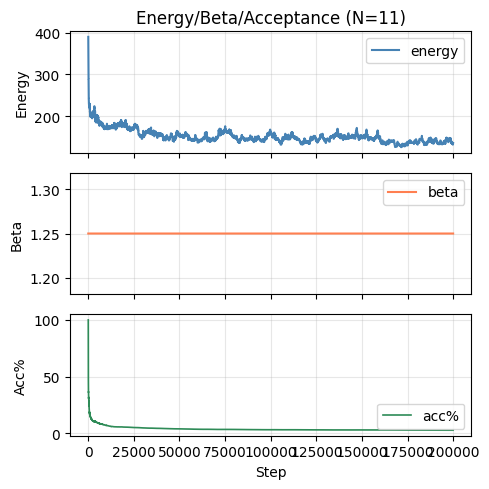

In [2]:
trace = run_mcmc(N=11, beta=1.25, max_steps=200000, verbose=True, schedule="fixed", seed=123)
plot_energy_curve(trace)

N=11, num_zero_runs=2, final_energies=[136, 0, 0]


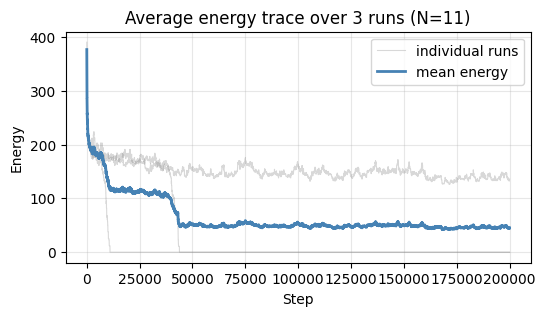

In [3]:
result = average_energy_over_runs(N=11, beta=1.25, max_steps=200000, runs=3, base_seed=123)
plot_energy_curve_average(*result)

## MCMC with annealing

step 5000: energy=207, beta=1.010, acceptance=10.9%
step 10000: energy=175, beta=1.020, acceptance=9.6%
step 15000: energy=192, beta=1.031, acceptance=8.7%
step 20000: energy=175, beta=1.041, acceptance=8.2%
step 25000: energy=172, beta=1.052, acceptance=7.9%
step 30000: energy=166, beta=1.063, acceptance=7.3%
step 35000: energy=164, beta=1.074, acceptance=7.3%
step 40000: energy=173, beta=1.084, acceptance=7.0%
step 45000: energy=149, beta=1.096, acceptance=6.7%
step 50000: energy=26, beta=1.107, acceptance=6.5%
N=11: Found energy 0 at step 50599


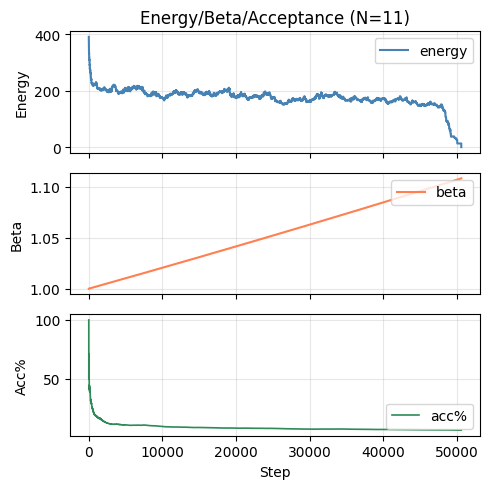

In [4]:
trace = run_mcmc(N=11, beta=1.0, beta_end=1.5, max_steps=200000, verbose=True, schedule="geometric", cooling_rate=1.001, seed=123)
plot_energy_curve(trace)

N=11, num_zero_runs=3, final_energies=[0, 0, 0]


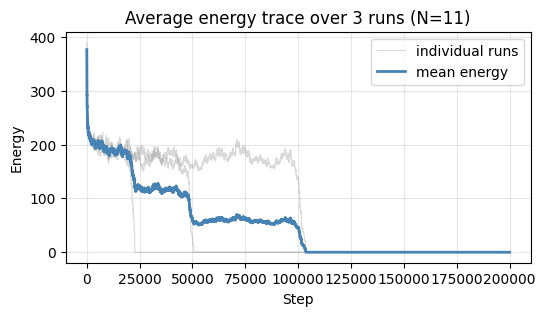

In [5]:
result = average_energy_over_runs(N=11, beta=1.0, beta_end=1.5, max_steps=200000, runs=3, base_seed=123, schedule="geometric", cooling_rate=1.001)
plot_energy_curve_average(*result)

## Comparing the effect of annealing

N=11, num_zero_runs=3, final_energies=[136, 0, 0, 0, 166]


N=11, num_zero_runs=0, final_energies=[156, 156, 159, 133, 146]


N=11, num_zero_runs=4, final_energies=[0, 0, 0, 0, 137]


N=11, num_zero_runs=4, final_energies=[0, 0, 0, 180, 0]


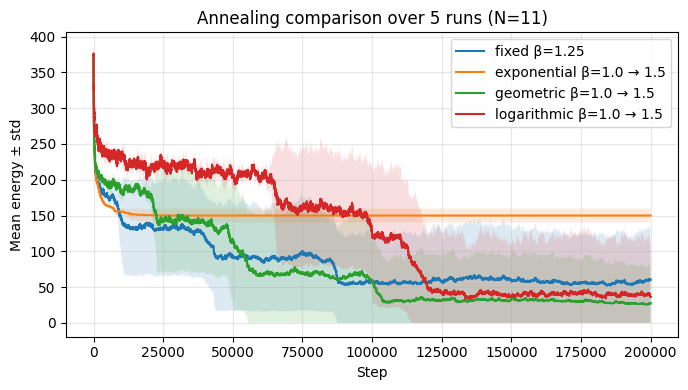

In [6]:
compare_annealing_effect(N=11, beta_fix=1.25, beta_annealing_start=1.0, beta_annealing_end=1.5, max_steps=200000, runs=5, base_seed=123, cooling_rate=1.001)

## Minimal energy vs. board size (annealing)

Use the simulated annealing routine for a sweep of N values and log the smallest energy observed. Larger N typically demand more annealing steps or repeated runs before the curve stabilizes.

Processing N values: 100%|██████████| 10/10 [11:03<00:00, 66.39s/it] 


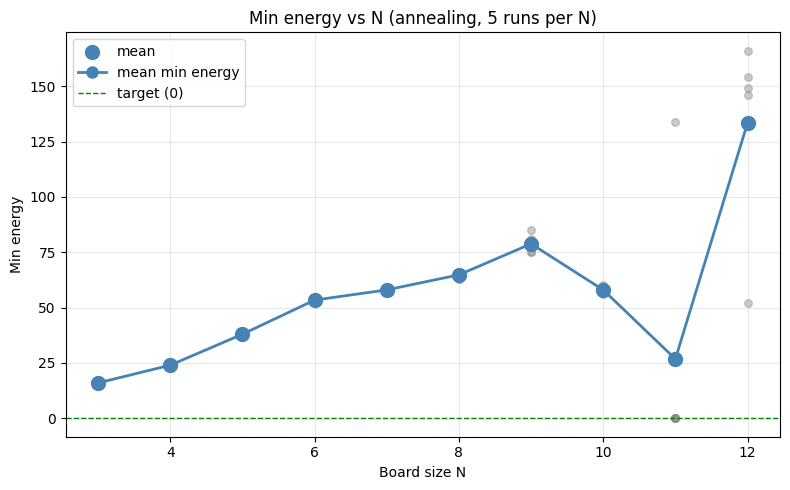

In [7]:
N_values = np.arange(3, 13)
result = min_energy_vs_N(N_values, beta=1.0, beta_end=1.5, max_steps=200000, runs=5, schedule="geometric", cooling_rate=1.001, target_energy=0, base_seed=123)
plot_min_energy_vs_N(result)

## Optimal Solution illustration

In [8]:
def latin_queen_construction(N):
    a, b = 3, 5
    state = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(N):
            state[i, j] = (a * i + b * j) % N 
    return state

In [9]:
N = 11
state = latin_queen_construction(N)
print(state)
print("energy of Latin-queen construction:", compute_energy(state))

[[ 0  5 10  4  9  3  8  2  7  1  6]
 [ 3  8  2  7  1  6  0  5 10  4  9]
 [ 6  0  5 10  4  9  3  8  2  7  1]
 [ 9  3  8  2  7  1  6  0  5 10  4]
 [ 1  6  0  5 10  4  9  3  8  2  7]
 [ 4  9  3  8  2  7  1  6  0  5 10]
 [ 7  1  6  0  5 10  4  9  3  8  2]
 [10  4  9  3  8  2  7  1  6  0  5]
 [ 2  7  1  6  0  5 10  4  9  3  8]
 [ 5 10  4  9  3  8  2  7  1  6  0]
 [ 8  2  7  1  6  0  5 10  4  9  3]]
energy of Latin-queen construction: 0
